# Submission

---

Submission for the P1 project navigation for the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Import external packages

In [1]:
import numpy as np
import random
from unityagents import UnityEnvironment
from collections import deque
from IPython import display

import torch
n_device = torch.cuda.current_device()
torch.cuda.get_device_name(n_device)

#import os, sys
#print(os.getcwd())
#sys.path.append(os.getcwd())

import matplotlib.pyplot as plt
%matplotlib inline

## Import my own Deep Q-network and agent

In [4]:
import dqn_model
import dqn_agent

#import importlib
#importlib.reload(dqn_model)
#importlib.reload(dqn_agent)

### Define BANANA environment and print some of it's basic features like state and action sizes, etc. 

In [6]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Found path: /home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana.x86_64
Mono path[0] = '/home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana_Data/Managed'
Mono config path = '/home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/markus/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [ ]:
def dqn(env, agent, n_episodes=1800, max_t=1600, eps_start=1.0, eps_end=0.005, eps_decay=0.997):
    """Deep Q-Learning.
    
    Params
    ======
        env: the banana environment
        agent: a dqn_agent instance
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                     # list containing scores from each episode
    scores_window = deque(maxlen=100)     # last 100 scores
    eps = eps_start                # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} @eps {:8f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_15.pth')
            break
    return scores

In [8]:
agent = dqn_agent.AgentPureDQN(state_size=state_size, action_size=action_size, seed=0)

Episode 100	Average Score: 0.12 @eps 0.740484
Episode 200	Average Score: 2.07 @eps 0.548317
Episode 300	Average Score: 5.36 @eps 0.406020
Episode 400	Average Score: 6.96 @eps 0.300651
Episode 500	Average Score: 9.41 @eps 0.222628
Episode 600	Average Score: 12.10 @eps 0.164852
Episode 700	Average Score: 13.25 @eps 0.122071
Episode 800	Average Score: 13.29 @eps 0.090391
Episode 900	Average Score: 13.99 @eps 0.066933
Episode 1000	Average Score: 14.54 @eps 0.049563
Episode 1062	Average Score: 15.00
Environment solved in 962 episodes!	Average Score: 15.00


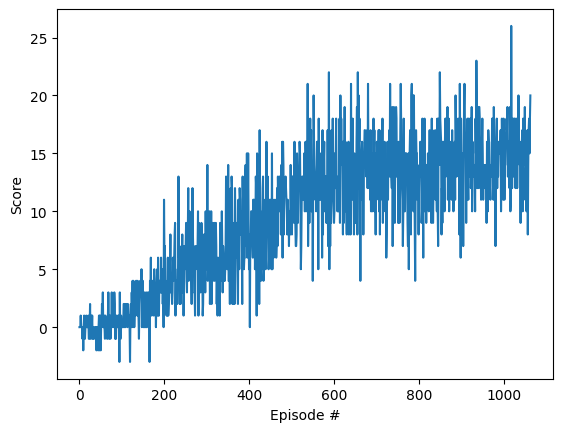

In [9]:
scores = dqn(env, agent)

env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("convergence_rate_15.png")
plt.show()

In [ ]:
# Imports
import torch
import dqn_agent
from unityagents import UnityEnvironment

# Setup environment
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]                   # get the current state
state_size = len(state)

# Load the weights from file
agent = dqn_agent.AgentPureDQN(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_15.pth'))

# Take 1000 steps in the environment
score = 0                                                      # initialize the score
for i in range(10000):
    action = agent.act(state)                   # select an action
    env_info = env.step(action)[brain_name]      # send the action to the environment
    next_state = env_info.vector_observations[0]       # get the next state
    reward = env_info.rewards[0]                       # get the reward
    done = env_info.local_done[0]                      # see if episode has finished
    score += reward                                         # update the score
    state = next_state                                 # roll over the state to next time step
    if done:                                                # exit loop if episode finished
        break
    
print("Score: {}".format(score))    
        
env.close()

Found path: /home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana.x86_64
Mono path[0] = '/home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana_Data/Managed'
Mono config path = '/home/markus/Dokumente/lernen/Udacity/deep_reinforcement_learning/Value-based-methods/p1_navigation_submission/Banana_Linux/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/markus/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 15.0
